In [1]:
from cryptocmd import CmcScraper

# initialise scraper without time interval for max historical data
scraper = CmcScraper("BTC")
# Pandas dataFrame for the same data
df = scraper.get_dataframe()

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3690 entries, 0 to 3689
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        3690 non-null   datetime64[ns]
 1   Open        3690 non-null   float64       
 2   High        3690 non-null   float64       
 3   Low         3690 non-null   float64       
 4   Close       3690 non-null   float64       
 5   Volume      3690 non-null   float64       
 6   Market Cap  3690 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 201.9 KB


In [3]:
df.describe()

,Open,High,Low,Close,Volume,Market Cap
count,3690.000000,3690.000000,3690.000000,3690.000000,3.690000e+03,3.690000e+03
mean,11660.528027,11947.837098,11344.468021,11666.622224,1.430397e+10,2.163916e+11
std,15544.683616,15934.995954,15098.633258,15542.522810,1.908861e+10,2.942890e+11
min,68.504997,74.561096,65.526001,68.431000,0.000000e+00,7.784112e+08
25%,536.646255,570.298477,517.229752,538.156494,4.748608e+07,7.131818e+09
50%,6210.370933,6361.453645,6044.554932,6209.004902,4.976698e+09,1.072053e+11
75%,16637.374967,16866.181465,16414.290312,16638.027142,2.505877e+10,3.171995e+11
max,67549.735581,68789.625939,66382.061008,67566.830088,3.509679e+11,1.274831e+12


In [4]:
df.isnull().sum()

Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2023-06-04,27075.122073,27407.018570,26968.224141,27119.067193,9.360912e+09,5.259202e+11
1,2023-06-03,27252.323333,27317.051854,26958.003740,27075.129398,8.385597e+09,5.250436e+11
2,2023-06-02,26824.556981,27303.861687,26574.644421,27249.588949,1.483741e+10,5.284044e+11
3,2023-06-01,27218.412376,27346.105483,26671.721156,26819.973220,1.467897e+10,5.200450e+11
4,2023-05-31,27700.530089,27831.677804,26866.453944,27219.658608,1.565637e+10,5.277732e+11


In [7]:
df['Tomorrow'] = df[['Close']].shift(1)

In [8]:
df['Target'] = (df['Tomorrow'] > df['Close']).astype(int)

In [9]:
df = df.dropna()

In [10]:
df = df.rename(columns={'Market Cap':'Market_Cap'})

In [11]:
df.head()

,Date,Open,High,Low,Close,Volume,Market_Cap,Tomorrow,Target
1,2023-06-03,27252.323333,27317.051854,26958.003740,27075.129398,8.385597e+09,5.250436e+11,27119.067193,1
2,2023-06-02,26824.556981,27303.861687,26574.644421,27249.588949,1.483741e+10,5.284044e+11,27075.129398,0
3,2023-06-01,27218.412376,27346.105483,26671.721156,26819.973220,1.467897e+10,5.200450e+11,27249.588949,1
4,2023-05-31,27700.530089,27831.677804,26866.453944,27219.658608,1.565637e+10,5.277732e+11,26819.973220,0
5,2023-05-30,27745.123603,28044.759798,27588.502766,27702.348775,1.325108e+10,5.371065e+11,27219.658608,0


In [12]:
df['Target'].value_counts()

1    1955
0    1734
Name: Target, dtype: int64

In [13]:
'''
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
x=0
for i in df:
    if i=="Date":
        continue
    sns.histplot(data=df,x=i,kde=True)
    print('\n')
    plt.show()
'''

'\nimport seaborn as sns\nimport matplotlib.pyplot as plt\nplt.figure(figsize=(8,6))\nx=0\nfor i in df:\n    if i=="Date":\n        continue\n    sns.histplot(data=df,x=i,kde=True)\n    print(\'\n\')\n    plt.show()\n'

In [14]:
'''
import matplotlib.pyplot as plt
for i in df:
    plt.figure(figsize=(10,5))
    if i=='Date':
        continue
    sns.lineplot(data=df, x="Date", y="Close")
    plt.title(i, fontsize=20)
    plt.show()
'''
    

'\nimport matplotlib.pyplot as plt\nfor i in df:\n    plt.figure(figsize=(10,5))\n    if i==\'Date\':\n        continue\n    sns.lineplot(data=df, x="Date", y="Close")\n    plt.title(i, fontsize=20)\n    plt.show()\n'

In [15]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])

fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

In [16]:
df.set_index("Date", inplace = True)

In [17]:
df.index

DatetimeIndex(['2023-06-03', '2023-06-02', '2023-06-01', '2023-05-31',
               '2023-05-30', '2023-05-29', '2023-05-28', '2023-05-27',
               '2023-05-26', '2023-05-25',
               ...
               '2013-05-07', '2013-05-06', '2013-05-05', '2013-05-04',
               '2013-05-03', '2013-05-02', '2013-05-01', '2013-04-30',
               '2013-04-29', '2013-04-28'],
              dtype='datetime64[ns]', name='Date', length=3689, freq=None)

In [18]:
index = df.loc['2021-01-01':'2022-01-01'].index
bitcoin_open = df.loc['2021-01-01':'2022-01-01']['Open']

In [19]:
bitcoin_open

Date
2022-01-01    46311.744663
2021-12-31    47169.372859
2021-12-30    46490.606049
2021-12-29    47623.870463
2021-12-28    50679.859377
                  ...     
2021-01-05    31977.041132
2021-01-04    32810.947644
2021-01-03    32129.407356
2021-01-02    29376.455834
2021-01-01    28994.008916
Name: Open, Length: 366, dtype: float64

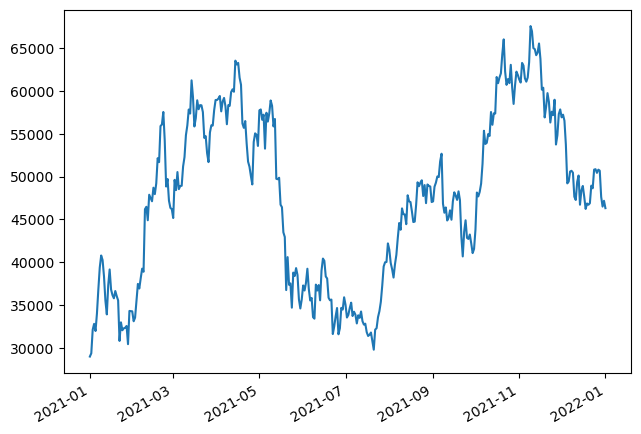

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
figure,axis = plt.subplots()
plt.tight_layout()
figure.autofmt_xdate()
axis.plot(index,bitcoin_open)

In [21]:
df.to_csv('Bitcoin_data.csv')